In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



```
# This is formatted as code
```

### Import the dataset

In [ ]:
df=pd.read_csv('Titanic (1).csv')

In [ ]:
df.shape

(891, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   survived                   891 non-null    int64  
 1   pclass                     891 non-null    int64  
 2   age                        891 non-null    float64
 3   sibsp                      891 non-null    int64  
 4   parch                      891 non-null    int64  
 5   fare                       891 non-null    float64
 6   male                       891 non-null    int64  
 7   age_was_missing            891 non-null    bool   
 8   embarked_from_cherbourg    891 non-null    int64  
 9   embarked_from_queenstown   891 non-null    int64  
 10  embarked_from_southampton  891 non-null    int64  
dtypes: bool(1), float64(2), int64(8)
memory usage: 70.6 KB


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,survived,pclass,age,sibsp,parch,fare,male,age_was_missing,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,False,0,0,1
1,1,1,38.0,1,0,71.2833,0,False,1,0,0
2,1,3,26.0,0,0,7.9250,0,False,0,0,1
3,1,1,35.0,1,0,53.1000,0,False,0,0,1
4,0,3,35.0,0,0,8.0500,1,False,0,0,1


### Data quality check:
   #### a.Check if the null values are present.If there are,drop those rows

In [ ]:
df.isnull().values.any()

False

So there are no null values in the dataset

In [ ]:
df.drop('age_was_missing',axis=1,inplace=True)

### Exploratory Data Analysis:
   #### a.Univariate Analysis:
   ##### 1.Draw a minimum of 5 histograms
   ##### 2.Draw boxplots for each numerical columns.

[(0, 'survived'), (1, 'pclass'), (2, 'age'), (3, 'sibsp'), (4, 'parch'), (5, 'fare')]


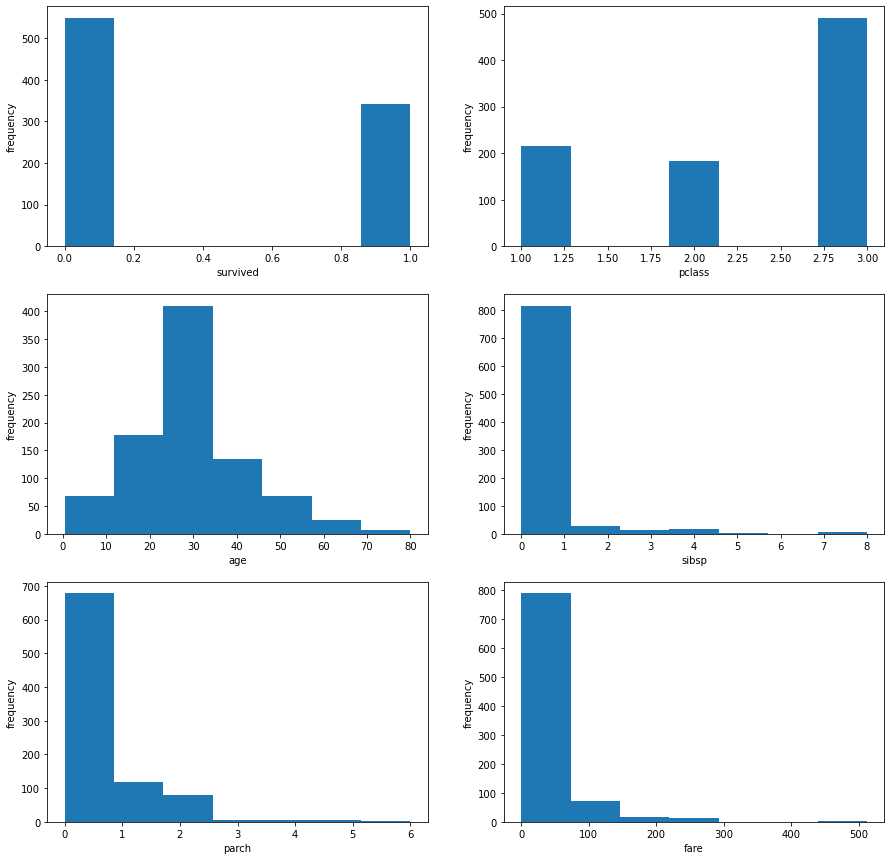

In [ ]:
plt.figure(figsize=(15,15))
features=list(df.columns)
a=list(enumerate(features))
while len(a)-6>0:
    a.pop()
print(a)
for i in a:
    plt.subplot(3,2,i[0]+1)
    plt.hist(df[i[1]],bins=7)
    plt.xlabel(i[1])
    plt.ylabel('frequency')

[(0, 'survived'), (1, 'pclass'), (2, 'age'), (3, 'sibsp'), (4, 'parch'), (5, 'fare'), (6, 'male'), (7, 'embarked_from_cherbourg'), (8, 'embarked_from_queenstown'), (9, 'embarked_from_southampton')]


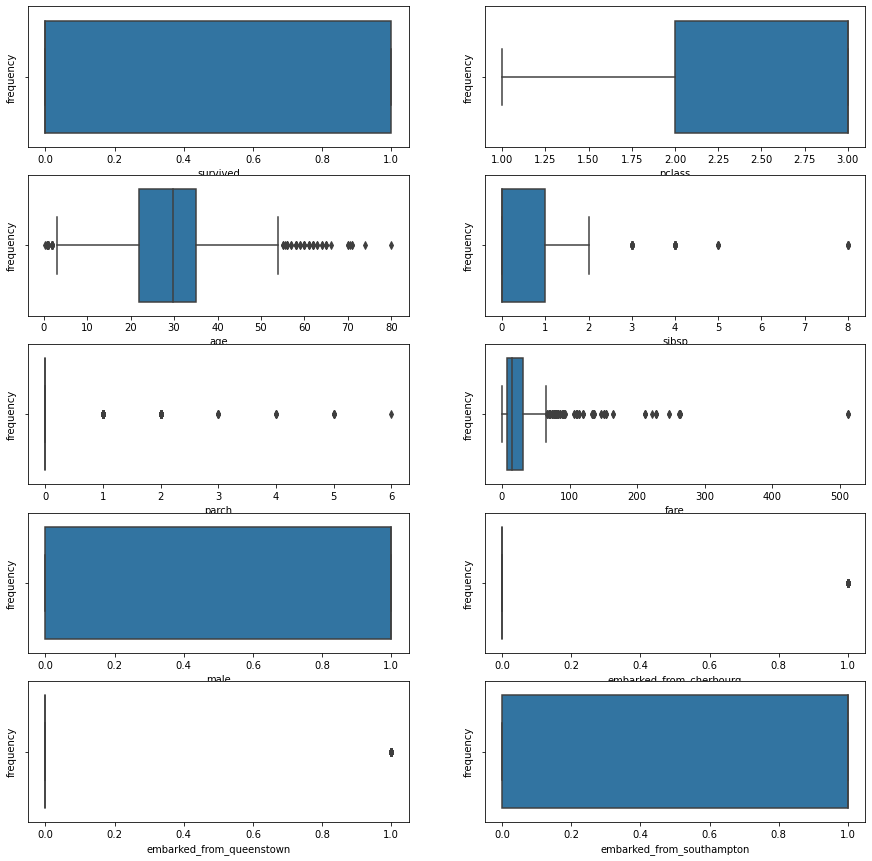

In [ ]:
plt.figure(figsize=(15,15))
features=list(df.columns)
a=list(enumerate(features))
print(a)
for i in a:
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(df[i[1]])
    plt.xlabel(i[1])
    plt.ylabel('frequency')

#### b.Bivariate Analysis:
##### 1.Draw a minimum of 5 scatter plots

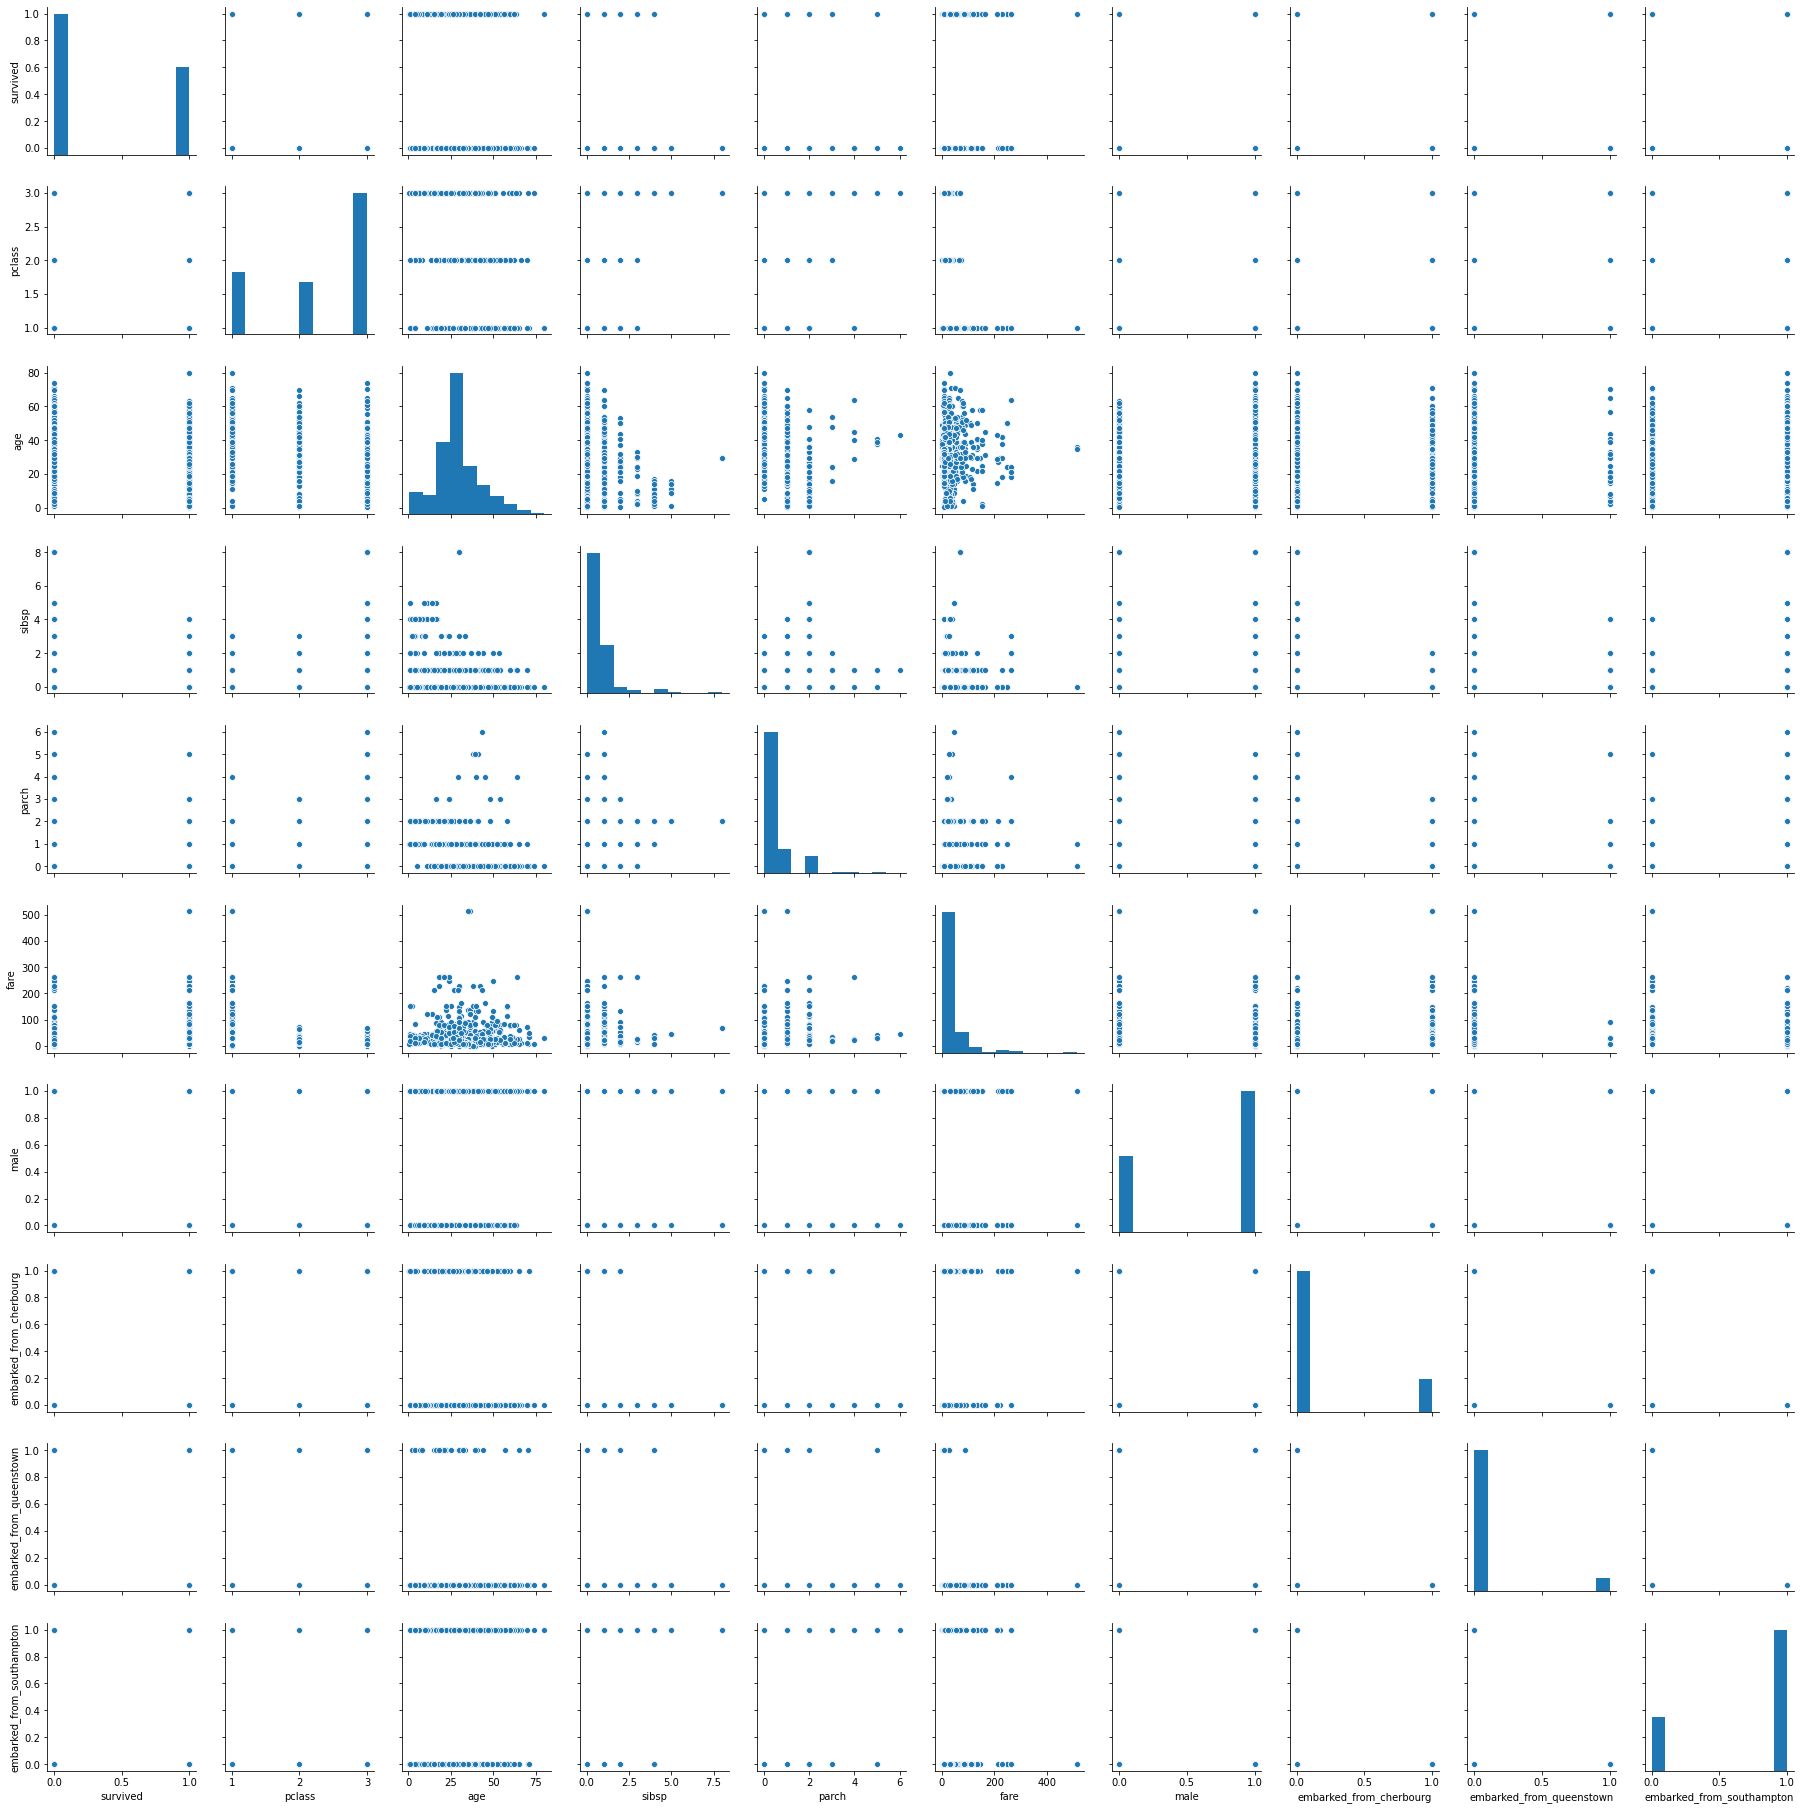

In [ ]:
sns.pairplot(df)

### Perform Dimensionality Reduction based on correlation(correlation threshold:0.8)

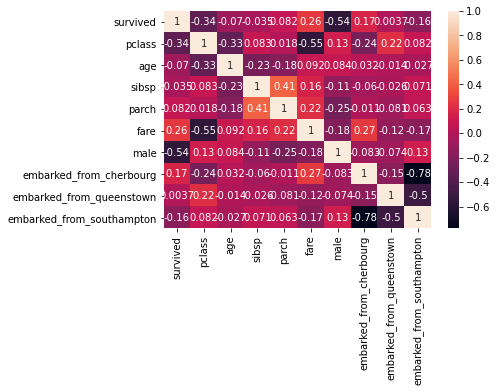

In [ ]:
sns.heatmap(df.corr(),annot=True)

### Splitting the given dataset

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('survived',axis=1)
y=df.iloc[:,0:1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Applying Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("accuracy score is :",(accuracy_score(predictions,y_test)*100))
print(confusion_matrix(y_test,predictions))

C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy score is : 80.44692737430168
[[90 15]
 [20 54]]


C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Applying KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,15,27,50,75,100]}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,verbose=3)
grid.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ....................... n_neighbors=1, score=0.692, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.678, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.690, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.655, total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\


[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.683, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.685, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.727, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.669, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.697, total=   0.0s
[CV] n_neighbors=15 ..................................................
[CV] ...................... n_neighbors=15, score=0.648, total=   0.0s
[CV] n_neighbors=27 ..................................................
[CV] ...................... n_neighbors=27, score=0.706, total=   0.0s
[CV] 

C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vect

[CV] ...................... n_neighbors=27, score=0.655, total=   0.0s
[CV] n_neighbors=27 ..................................................
[CV] ...................... n_neighbors=27, score=0.697, total=   0.0s
[CV] n_neighbors=27 ..................................................
[CV] ...................... n_neighbors=27, score=0.669, total=   0.0s
[CV] n_neighbors=50 ..................................................
[CV] ...................... n_neighbors=50, score=0.678, total=   0.0s
[CV] n_neighbors=50 ..................................................
[CV] ...................... n_neighbors=50, score=0.678, total=   0.0s
[CV] n_neighbors=50 ..................................................
[CV] ...................... n_neighbors=50, score=0.648, total=   0.0s
[CV] n_neighbors=50 ..................................................
[CV] ...................... n_neighbors=50, score=0.662, total=   0.0s
[CV] n_neighbors=50 ..................................................
[CV] .

C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vect

[CV] ...................... n_neighbors=75, score=0.664, total=   0.0s
[CV] n_neighbors=75 ..................................................
[CV] ...................... n_neighbors=75, score=0.620, total=   0.0s
[CV] n_neighbors=75 ..................................................
[CV] ...................... n_neighbors=75, score=0.641, total=   0.0s
[CV] n_neighbors=75 ..................................................
[CV] ...................... n_neighbors=75, score=0.662, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.692, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.685, total=   0.0s
[CV] n_neighbors=100 .................................................


C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vect

[CV] ..................... n_neighbors=100, score=0.648, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.648, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.669, total=   0.0s


C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.9s finished
C:\Users\Cherry\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 15, 27, 50, 75, 100]}, verbose=3)

In [ ]:
grid.best_estimator_

KNeighborsClassifier(n_neighbors=27)

In [ ]:
model=KNeighborsClassifier(n_neighbors=27)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("accuracy score is :",(accuracy_score(predictions,y_test)*100))
print(confusion_matrix(y_test,predictions))

accuracy score is : 74.30167597765363
[[98  7]
 [39 35]]


C:\Users\Cherry\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


### Applying Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("accuracy score is :",(accuracy_score(predictions,y_test)*100))
print(confusion_matrix(y_test,predictions))

accuracy score is : 79.3296089385475
[[86 19]
 [18 56]]


### Applying Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("accuracy score is :",(accuracy_score(predictions,y_test)*100))
print(confusion_matrix(y_test,predictions))

C:\Users\Cherry\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


accuracy score is : 81.56424581005587
[[90 15]
 [18 56]]
